In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setup

In [63]:
BUG_FIELDS = [
    'P(Friendship|Friday)',
    'P(Relationship|Friday)',
    'P(Hookup|Friday)',
    'P(Friendship|Bored)',
    'P(Relationship|Bored)',
    'P(Hookup|Bored)',
    'P(Friendship|Missed Show)',
    'P(Relationship|Missed Show)',
    'P(Hookup|Missed Show)',
]

multi_answer_demographic_keys = ['Race', 'Major']

single_answer_demographic_keys = ['Gender', 'Sexuality', 'Age']

In [68]:
prior_df = pd.read_csv('prior_data.csv')
for key in multi_answer_demographic_keys:
    prior_df[key] = [eval(val) for val in prior_df[key]]

posterior_df = pd.read_csv('posterior_data.csv')
for key in multi_answer_demographic_keys:
    posterior_df[key] = [eval(val) for val in posterior_df[key]]

non_bug_posterior_df = posterior_df[posterior_df['Has Bug'] == False]
posterior_df.drop(BUG_FIELDS, axis = 1, inplace = True)

In [69]:
prior_keys = [k for k in list(prior_df.columns) if k.startswith('P')]
posterior_keys = [k for k in list(posterior_df.columns) if k.startswith('P')]

In [70]:
relationship_keys = [k for k in prior_keys if k.endswith('Relationship)')]
friendship_keys = [k for k in prior_keys if k.endswith('Friendship)')]
hookup_keys = [k for k in prior_keys if k.endswith('Hookup)')]

common_room_keys = [k for k in posterior_keys if k.endswith('Common Room)')]
lunch_keys = [k for k in posterior_keys if k.endswith('Lunch)')]
museum_keys = [k for k in posterior_keys if k.endswith('Museum)')]
oolong_keys = [k for k in posterior_keys if k.endswith('Oolong Tea)')]
party_keys = [k for k in posterior_keys if k.endswith('Party)')]
sick_keys = [k for k in posterior_keys if k.endswith('Sick)')]
wyd_keys = [k for k in posterior_keys if k.endswith('WYD)')]

friday_keys = ['P(Friendship|Friday)', 'P(Relationship|Friday)', 'P(Hookup|Friday)']
bored_keys = ['P(Friendship|Bored)', 'P(Relationship|Bored)', 'P(Hookup|Bored)']
missed_show_keys = ['P(Friendship|Missed Show)', 'P(Relationship|Missed Show)', 'P(Hookup|Missed Show)']

In [71]:
prior_keys_set = [relationship_keys, friendship_keys, hookup_keys]
posterior_keys_set = [common_room_keys, lunch_keys, museum_keys, oolong_keys, party_keys, sick_keys, wyd_keys]
non_bug_posterior_keys_set = [bored_keys, missed_show_keys, friday_keys]

# Full Prior and Posterior Plots

In [172]:
eps = 1e-3
bins = np.append(np.array([0, eps]), (np.arange(10) + 1) / 10)
bin_centers = np.arange(10) / 10 + 0.05
SCALE = 1500
EXP = 1.5

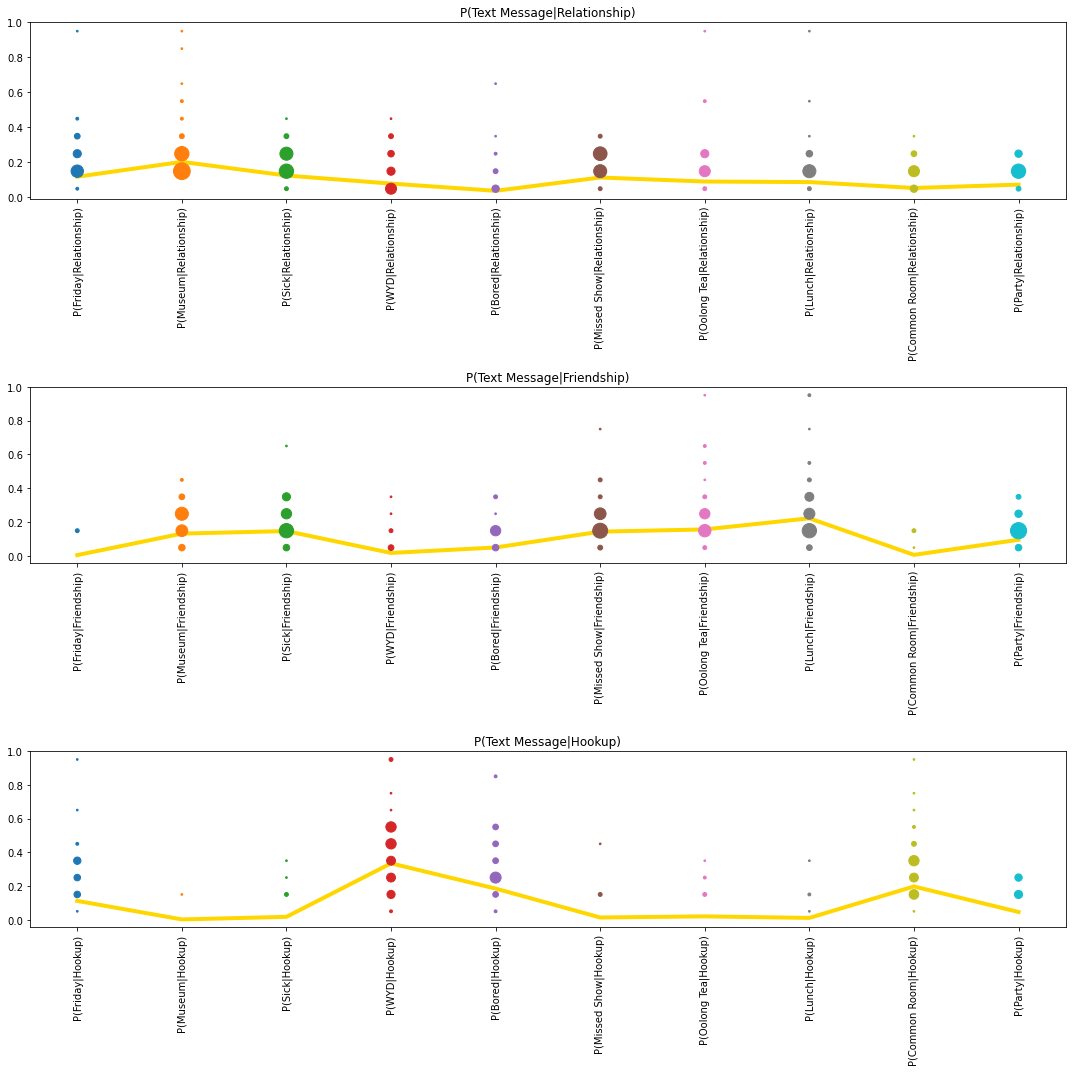

In [173]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
num_prior_fields = len(prior_keys_set[0])
x = np.arange(num_prior_fields) / num_prior_fields
moving_x = np.ones(10) / num_prior_fields
prior_graph_order = ['Relationship', 'Friendship', 'Hookup']
for i, keys in enumerate(prior_keys_set):
    # fields x values
    arr = prior_df[keys].to_numpy(dtype = np.float32).T
    avg = np.mean(arr, axis = 1)
    n = arr.shape[1]
    # fields x bin values
    plot = np.stack(tuple(np.histogram(data, bins = bins)[0][1:] for data in arr), axis = 0) / n
    for j in range(plot.shape[0]):
        ax[i].scatter(j * moving_x, bin_centers, s = SCALE * plot[j] ** EXP)
    ax[i].plot(x, avg, linewidth = 4, color = 'gold', zorder = 0)
    ax[i].set_xticks(x)
    ax[i].set_yticks(np.arange(6) / 5)
    ax[i].set_xticklabels(keys, rotation=90)
    ax[i].set_title(f'P(Text Message|{prior_graph_order[i]})')
fig.tight_layout()

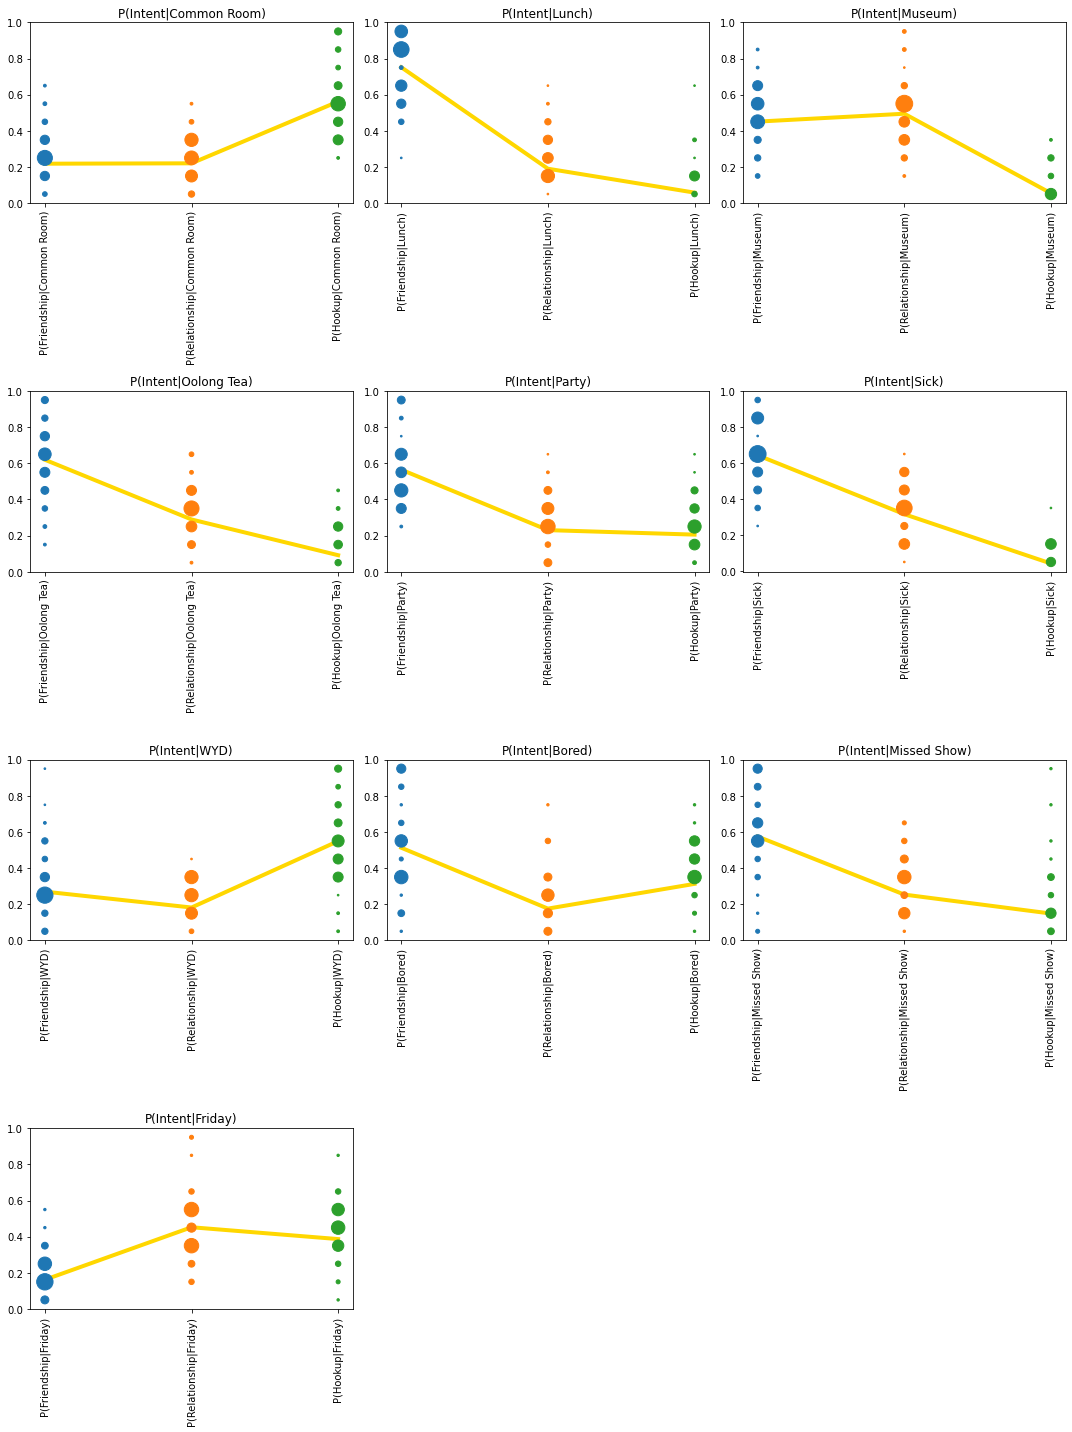

In [174]:
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
num_posterior_fields = len(posterior_keys_set[0])
x = np.arange(num_posterior_fields) / num_posterior_fields
moving_x = np.ones(10) / num_posterior_fields
posterior_graph_order = ['Common Room', 'Lunch', 'Museum', 'Oolong Tea', 'Party', 'Sick', 'WYD', 'Bored', 'Missed Show', 'Friday']
for i, keys in enumerate(posterior_keys_set + non_bug_posterior_keys_set):
    a, b = i // 3, i % 3
    df = posterior_df if i < 7 else non_bug_posterior_df
    # fields x values
    arr = df[keys].to_numpy(dtype = np.float32).T
    avg = np.mean(arr, axis = 1)
    n = arr.shape[1]
    # fields x bin values
    plot = np.stack(tuple(np.histogram(data, bins = bins)[0][1:] for data in arr), axis = 0) / n
    for j in range(plot.shape[0]):
        ax[a, b].scatter(j * moving_x, bin_centers, s = SCALE * plot[j] ** EXP)
    ax[a, b].plot(x, avg, linewidth = 4, color = 'gold', zorder = 0)
    ax[a, b].set_xticks(x)
    ax[a, b].set_yticks(np.arange(6) / 5)
    ax[a, b].set_xticklabels(keys, rotation=90)
    ax[a, b].set_title(f'P(Intent|{posterior_graph_order[i]})')
ax[3, 1].set_axis_off()
ax[3, 2].set_axis_off()
fig.tight_layout()

# Prior Plots by Demographics

In [175]:
demographic_dict = {
    'Race': ['White', 'Black', 'American Indian or Alaska Native', 'Asian', 'Native Hawaiian or Pacific Islander', 
             'Hispanic'],
    'Major': ['Arts', 'Humanities', 'STEM + Econ', 'Social Sciences'],
    'Gender': ['Man', 'Woman', 'Nonbinary'],
    'Sexuality': ['Heterosexual', 'Lesbian', 'Gay', 'Bisexual', 'Asexual']
}

color_sequence = ['blue', 'darkorange', 'gold', 'maroon', 'indigo', 'darkslategrey']

In [176]:
def demographic_prior_graph(demographic):
    if demographic not in multi_answer_demographic_keys + single_answer_demographic_keys:
        raise KeyError(f"{demographic} is not a valid demographic")
    labels = sorted(list(set(prior_df['Age']))) if demographic == 'Age' else demographic_dict[demographic]
    is_single = demographic in single_answer_demographic_keys

    num_prior_fields = len(prior_keys_set[0])
    x = np.arange(num_prior_fields) / num_prior_fields
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    for index in range(1, len(labels) + 1):
        if is_single:
            val = labels[index - 1] if demographic == 'Age' else index
            df = prior_df[prior_df[demographic] == val]
        else:
            df = prior_df[[(index in lst) for lst in prior_df[demographic]]]
        for i, keys in enumerate(prior_keys_set):
            # fields x values
            arr = df[keys].to_numpy(dtype = np.float32).T
            avg = np.mean(arr, axis = 1)
            ax[i].plot(x, avg, linewidth = 1, color = color_sequence[index - 1], label = labels[index - 1], marker = '.')

            # only set these graph attributes at the end
            if index == len(labels):
                ax[i].set_xticks(x)
                ax[i].set_yticks(np.arange(4) / 5)
                ax[i].set_xticklabels(keys, rotation=90)
                ax[i].set_title(f'P(Text|{prior_graph_order[i]})')
    ax[2].legend(bbox_to_anchor = (1,1))
    fig.tight_layout()

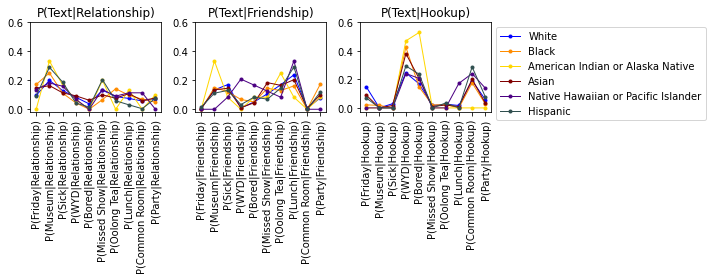

In [177]:
demographic_prior_graph('Race')

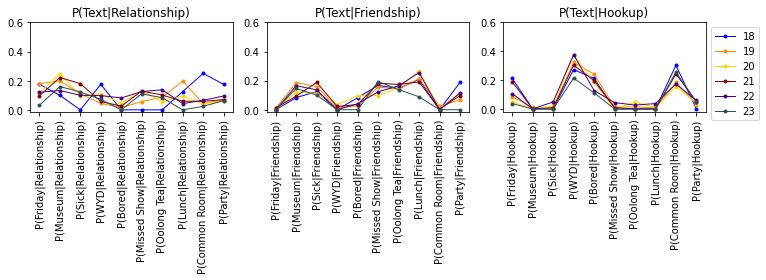

In [178]:
demographic_prior_graph('Age')

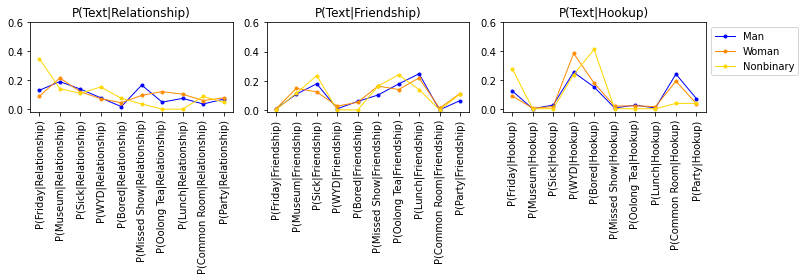

In [179]:
demographic_prior_graph('Gender')

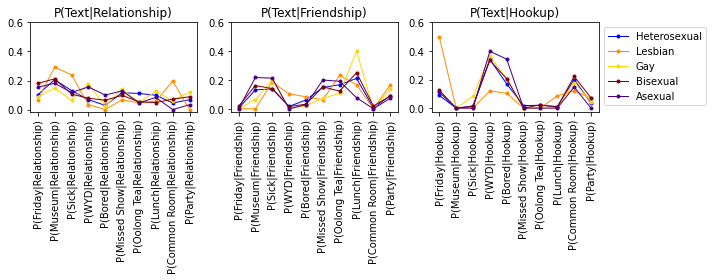

In [180]:
demographic_prior_graph('Sexuality')

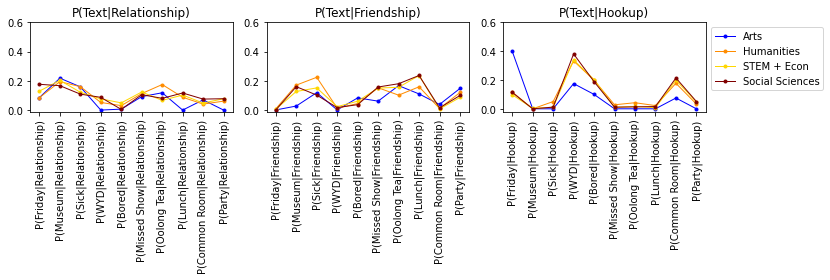

In [181]:
demographic_prior_graph('Major')

# Posterior Plots by Demographics

In [186]:
def demographic_posterior_graph(demographic):
    if demographic not in multi_answer_demographic_keys + single_answer_demographic_keys:
        raise KeyError(f"{demographic} is not a valid demographic")
    labels = sorted(list(set(prior_df['Age']))) if demographic == 'Age' else demographic_dict[demographic]
    is_single = demographic in single_answer_demographic_keys

    num_posterior_fields = len(posterior_keys_set[0])
    x = np.arange(num_posterior_fields) / num_posterior_fields
    fig, ax = plt.subplots(4, 3, figsize=(15, 20))

    for index in range(1, len(labels) + 1):
        if is_single:
            val = labels[index - 1] if demographic == 'Age' else index
            main_df = posterior_df[posterior_df[demographic] == val]
            non_bug_df = non_bug_posterior_df[non_bug_posterior_df[demographic] == val]
        else:
            main_df = posterior_df[[(index in lst) for lst in posterior_df[demographic]]]
            non_bug_df = non_bug_posterior_df[[(index in lst) for lst in non_bug_posterior_df[demographic]]]
        for i, keys in enumerate(posterior_keys_set + non_bug_posterior_keys_set):
            a, b = i // 3, i % 3
            df = main_df if i < 7 else non_bug_df
            if df.empty:
                continue
            # fields x values
            arr = df[keys].to_numpy(dtype = np.float32).T
            avg = np.mean(arr, axis = 1)
            ax[a, b].plot(x, avg, linewidth = 1, color = color_sequence[index - 1], label = labels[index - 1], marker = '.')

            # only set these graph attributes at the end
            if index == len(labels):
                ax[a, b].set_xticks(x)
                ax[a, b].set_yticks(np.arange(4) / 5)
                ax[a, b].set_xticklabels(keys, rotation=90)
                ax[a, b].set_title(f'P(Intent|{posterior_graph_order[i]})')
    ax[0, 2].legend(bbox_to_anchor = (1,1))
    ax[3, 1].set_axis_off()
    ax[3, 2].set_axis_off()
    fig.tight_layout()

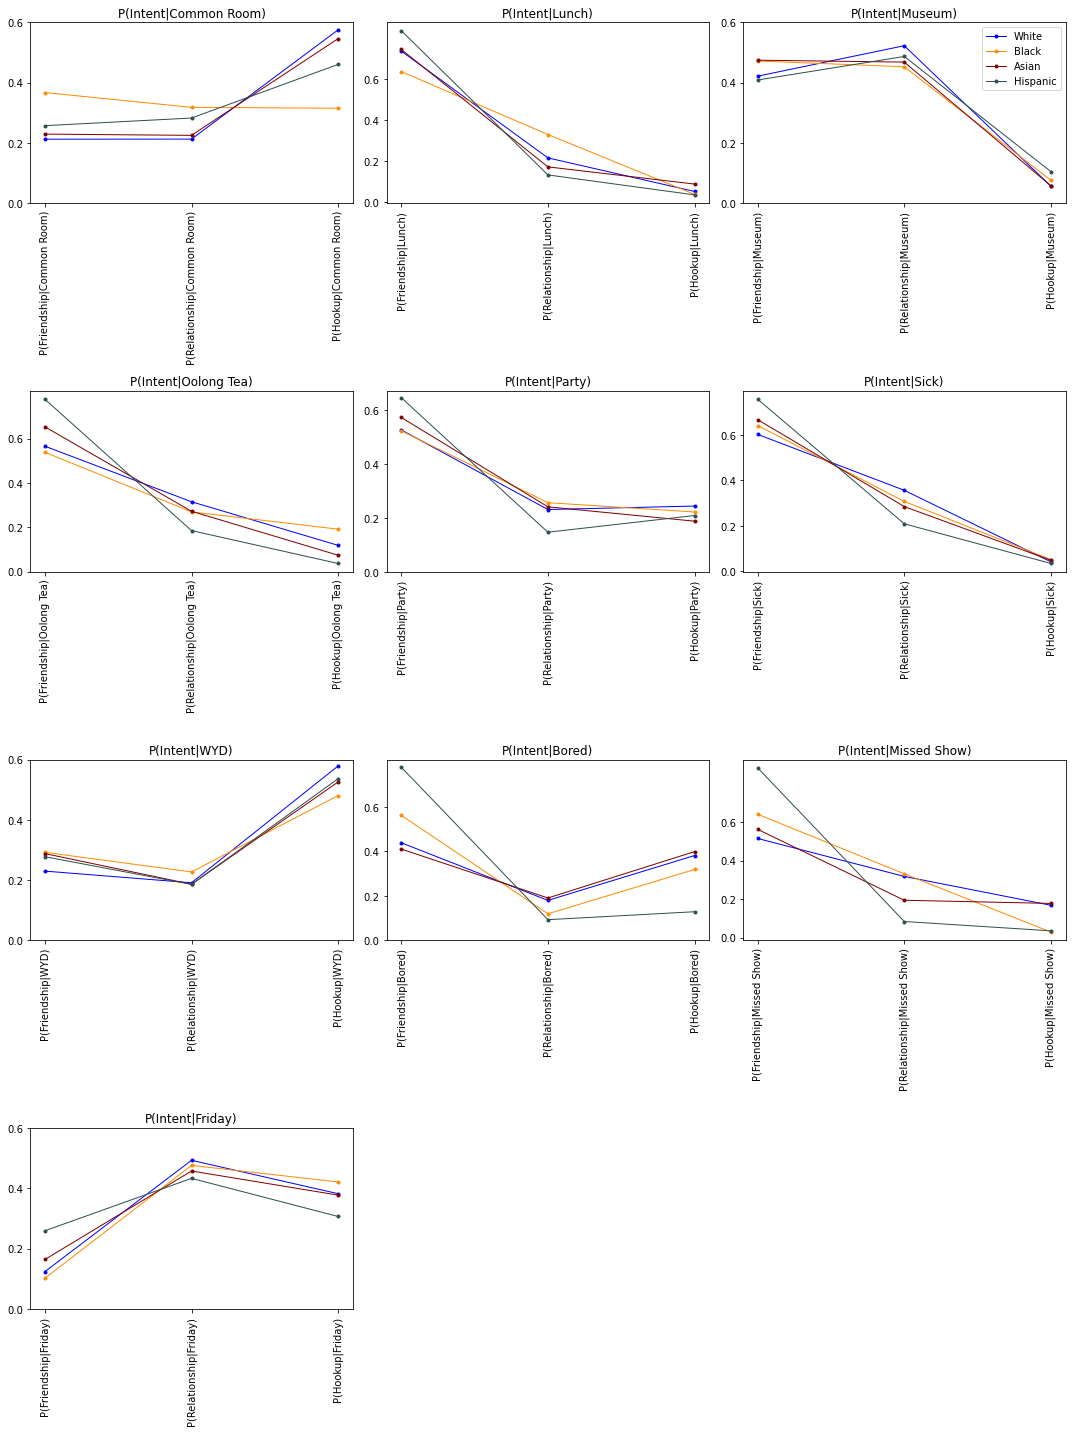

In [187]:
demographic_posterior_graph('Race')

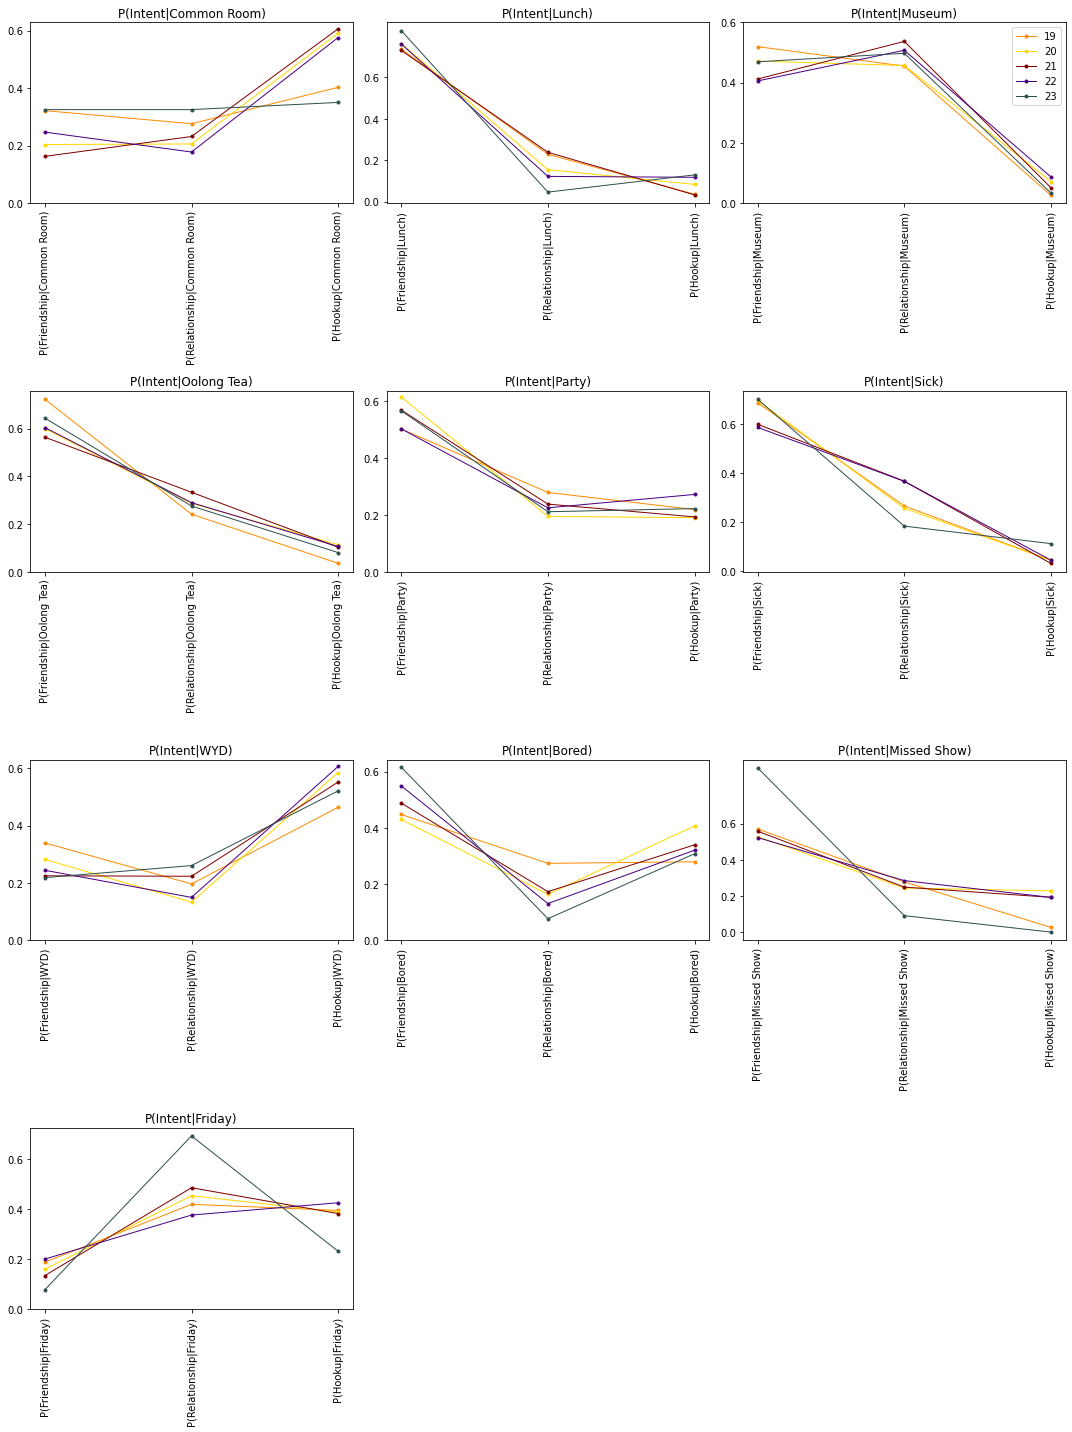

In [190]:
demographic_posterior_graph('Age')

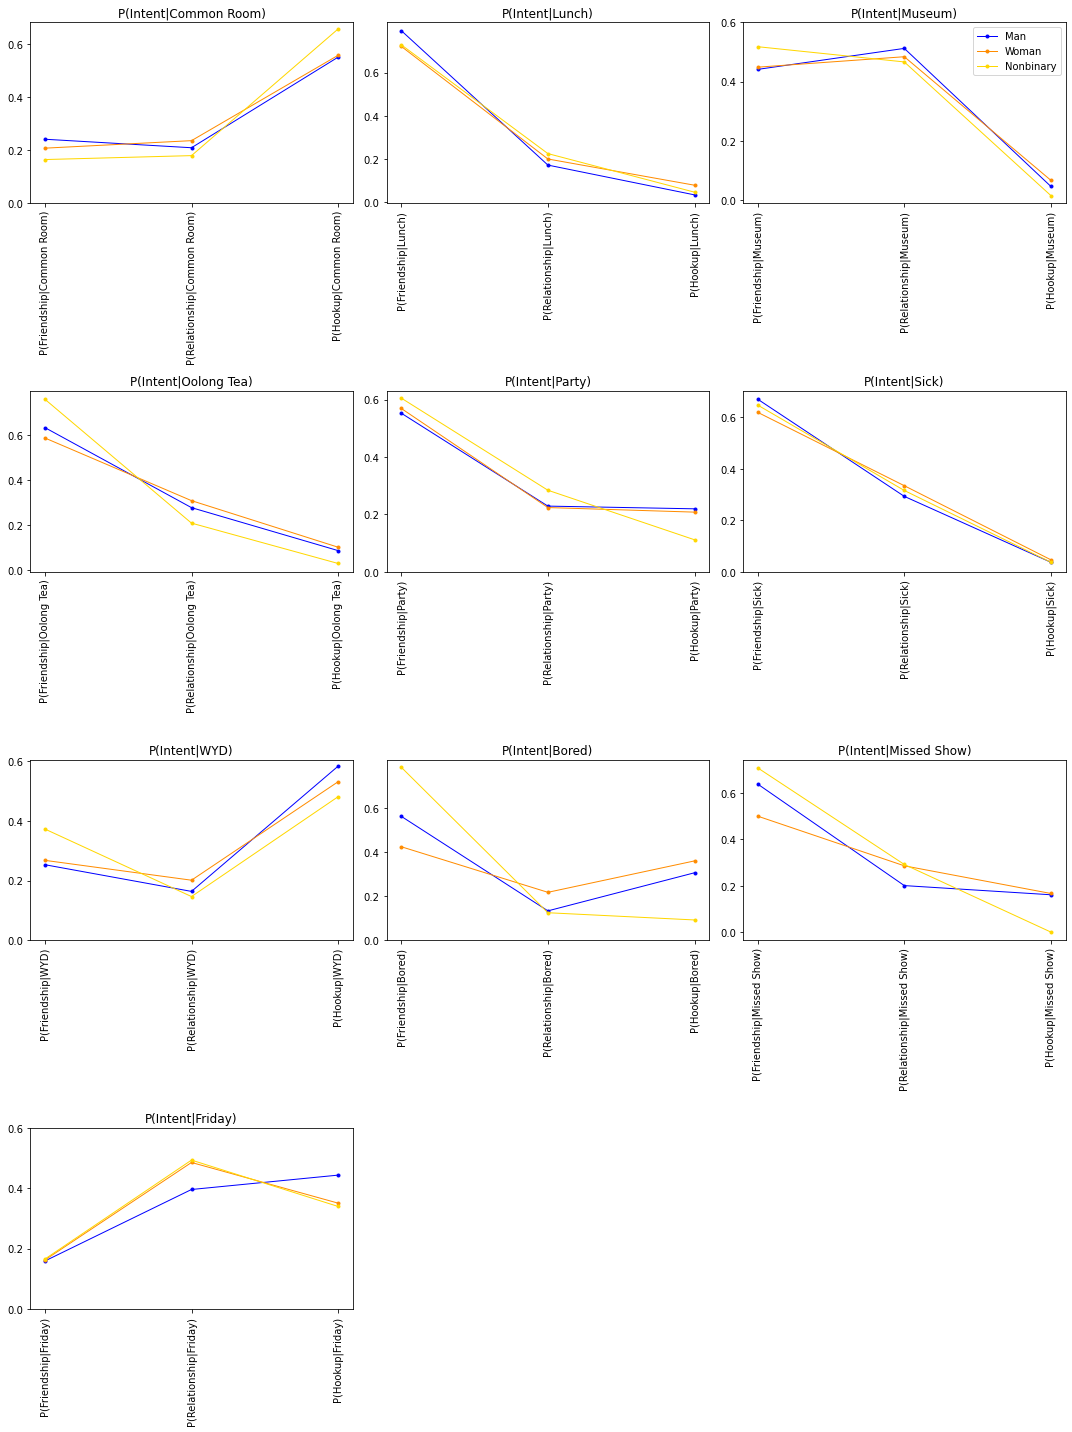

In [191]:
demographic_posterior_graph('Gender')

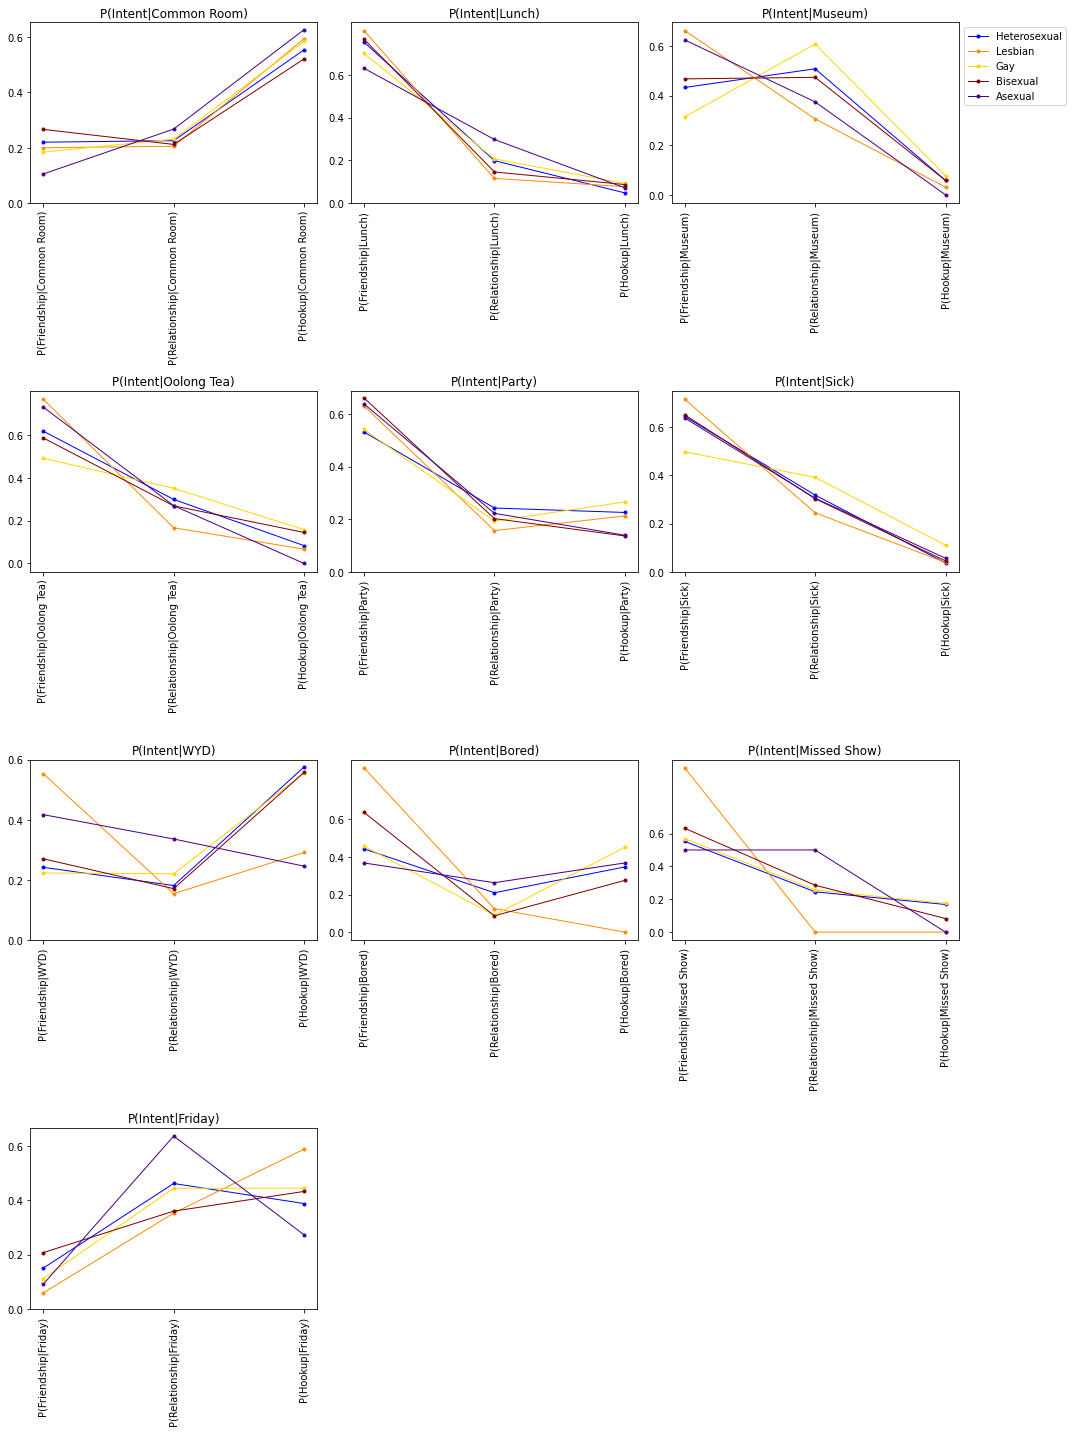

In [192]:
demographic_posterior_graph('Sexuality')

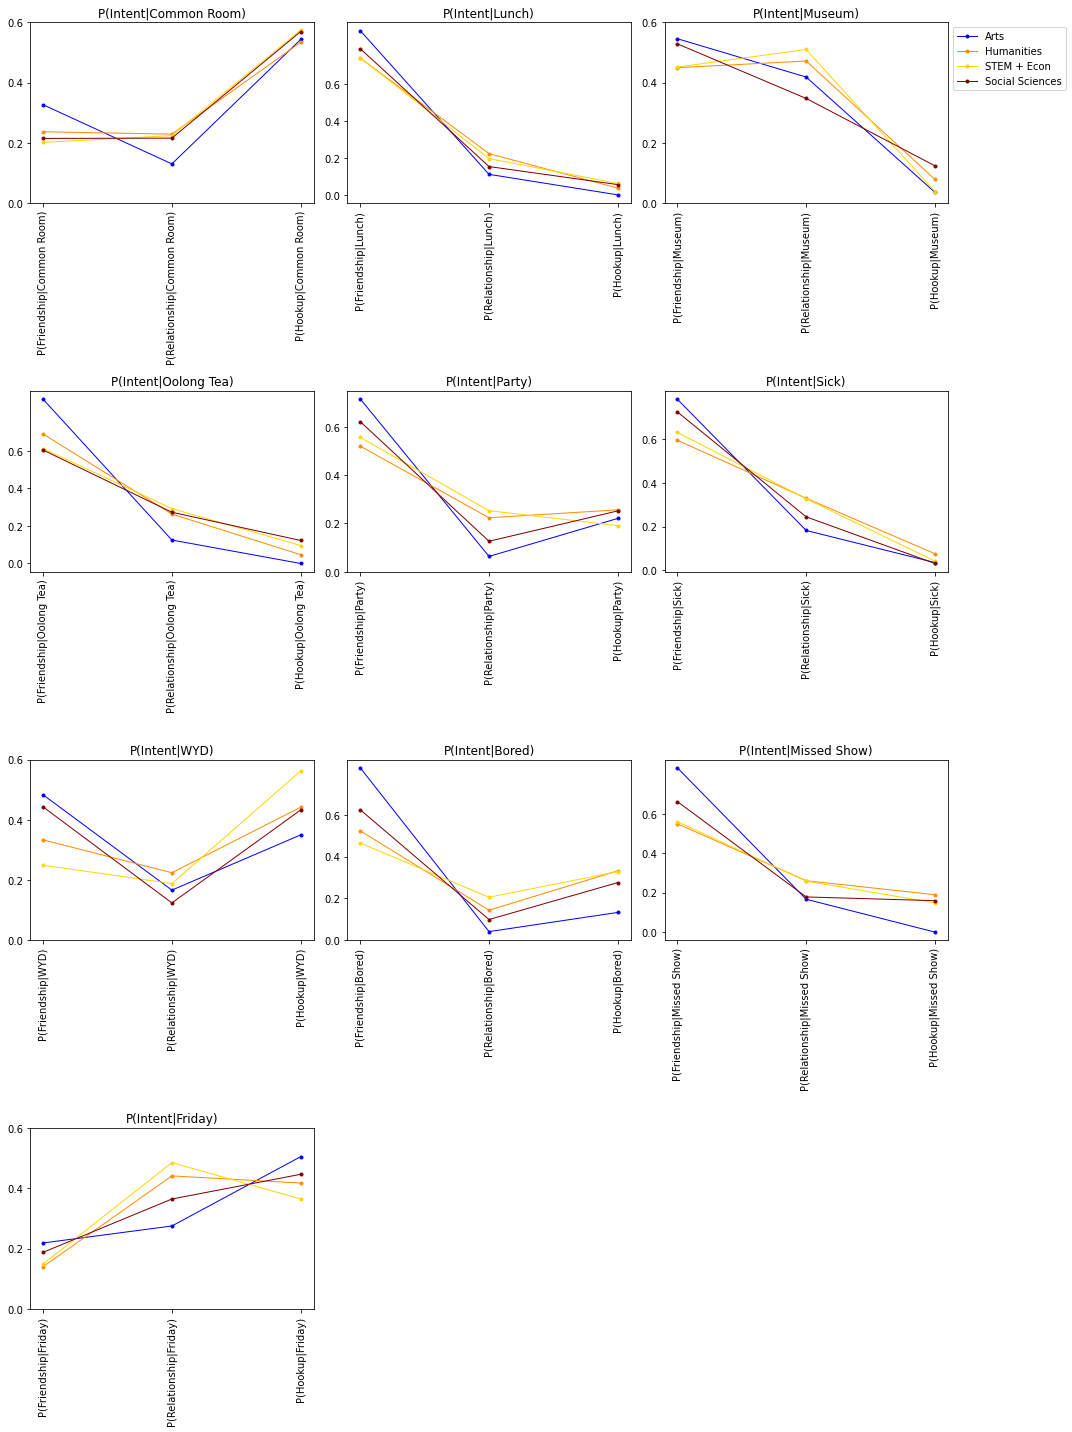

In [193]:
demographic_posterior_graph('Major')